# 대표적인 이산형 확률분포

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [2]:
# 확률 분포의 기대값과 분산을 계산하고 시각화 함수를 생성 -> 확률 분포 검증

# 그래프 선의 종류
linestyles = ['-', '--', ':']

#기댓값 함수
def E(X, g=lambda x: x): # X=확률변수의 집합, f= 확률변수 , g = 확률 변수에 적용될 함수
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

#분산함수
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g) #확률변수의 집합과 평균을 구한다
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

#확률 검증함수 : 확률 변수가 유효성 판단
def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')

#시각화 함수
def plot_prob(X): #확률분포 시각화
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set]) #확률값을 배열로 만들겠다
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob') #막대 차트로 확률을 표시하겠다
    ax.vlines(E(X), 0, 1, label='mean') #기대값을 세로선으로 표시하겠다
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

<img src="./이산분포의종류.png" width="1000px" height="500px" >
<img src="./이산분포의산식.png" width="1000px" height="500px" >
<img src="./확률1.png" width="1100px" height="500px" >

## 베르누이 분포

- 베르누이 시행 : 성공(S), 실패(F) -> 각 시행은 독립적이다. 성고의 확률은 P이다
- 베르누이 분포 : 확률변수가 취할수있는 값 0 ,1 밖에 없다

In [3]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [4]:
p = 0.3
X = Bern(p)
X

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [5]:
check_prob(X) #기대값과 분산결과를 확인

expected value 0.3
variance 0.21


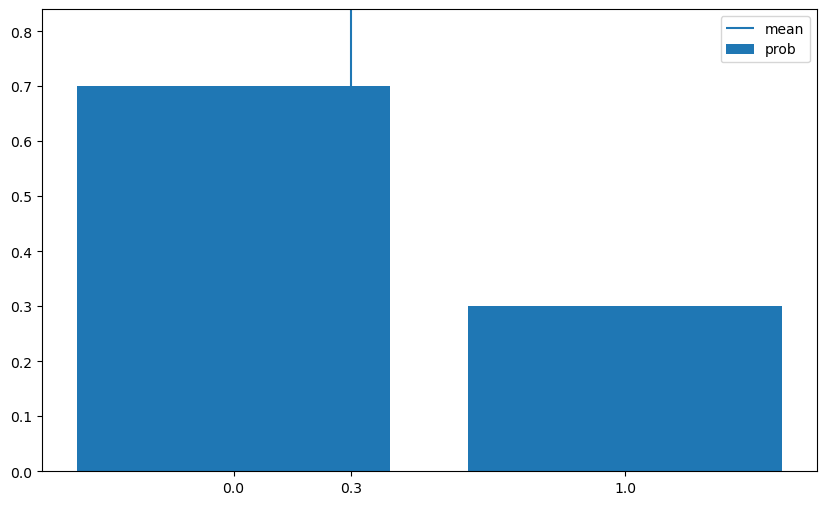

In [6]:
#평균과 확률 분포(확률의 면적 - 분산)의 관계
#세로 선이 중앙에 위치했다면 분포가 평균값에 대청적이다. 기대값이 한쪽으로 치우쳐 있으면 분포가 비대칭적이다.
#각값이 발생할 확률과 분포의 평균(기댓값)을 보여준다.
#평균선은 모든 확률값들에 대한 가중 평균한 값을 나타낸다 -> 확률 분포의 중심을 확인하는 것 -> 지표로 사용
plot_prob(X)

In [7]:
#stats - 통계 모듈이 가진 함수를 사용해서 결과를 출력해보자.

In [8]:
rv = stats.bernoulli(p) #베르누이 객체 생성 rv = 확률변수

In [9]:
# 0이 나올 확률 , 1이 나올 확률
rv.pmf(0), rv.pmf(1) # pmf : 확률질량함수

(0.700, 0.300)

In [10]:
rv.pmf([0, 1])

array([0.7, 0.3])

In [11]:
#cdf : 누적밀도함수
rv.cdf([0, 1])

array([0.7, 1. ])

In [12]:
rv.mean(), rv.var()

(0.300, 0.210)

## 이항분포

In [13]:
from scipy.special import comb
comb(5,2) #5개중에서 2개 고르는 조합의 수 (5*4*3*2*1) / (2*1*(3*2*1))
#comb(5,0) #'아무것도 선택하지 않는다'를  한개로 친다

10.000

In [14]:
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [15]:
#ex) 꽃나무가 10그루 이고 빨간 꽃을 필 확률이 0.3이라고 할때 
n = 10
p = 0.3
X = Bin(n, p)

In [16]:
check_prob(X)

expected value 3.0
variance 2.1


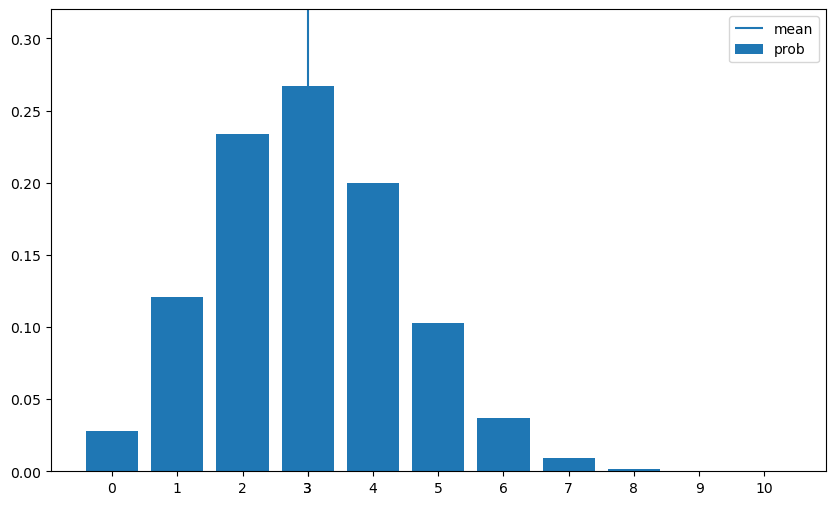

In [17]:
plot_prob(X)

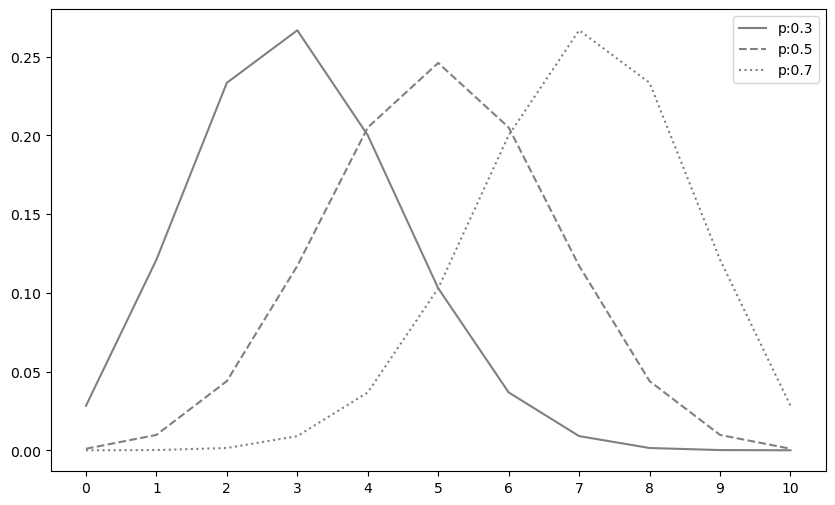

In [18]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

이항분포 그래프 모양
 - 성공 확률이 0.5에 가까우면 시행횟수 n의 크기에 상관없이 좌우대칭 종모양을 함
 - 시행횟수 n이 크면 성공확률의 크기에 관계 없이 이항 분포는 대칭을 이룬다
 - 성공확률이 0.5보다 작으면 오른쪽 꼬리에 분포
 - 성공확률이 0.5보다 크면 왼쪽 꼬리 분포

In [19]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

EX) stats.binom 함수 사용하여 이항확률변수 생성,stats.binom(시행화수,성공확률)
- 확룰변수 -> 확률분포 -> 시각화
- 성공확률 0.6인 베르누이 시행을 10번 반복했을 때의 성공 횟수의 확률변수 : rv

In [34]:
N=100
mu=0.6
rv = stats.binom(N,mu)
rv

In [35]:
xx= np.arange(N+1)
print(xx)

#10번 던져서 한번도 성공하지 않을 경우, 10번 던져서 1번 성공할 경우, 10번 던져서 2번 성공할 경우
#각 경우에 대한 확률 계산(pmf(xx))

print(rv.pmf(xx))

#10번 던져서 한번도 성공하지 않을 경우의 확률,10번 던져서 1번 성공할 경우의 확률, 10번 던져서 2번 성공할 경우의 확률
rv.pmf(xx).sum()

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
[1.607e-40 2.410e-38 1.790e-36 8.770e-35 3.190e-33 9.187e-32 2.182e-30
 4.395e-29 7.664e-28 1.175e-26 1.604e-25 1.969e-24 2.190e-23 2.224e-22
 2.073e-21 1.783e-20 1.421e-19 1.053e-18 7.282e-18 4.714e-17 2.864e-16
 1.637e-15 8.815e-15 4.484e-14 2.158e-13 9.841e-13 4.258e-12 1.751e-11
 6.846e-11 2.549e-10 9.051e-10 3.066e-09 9.915e-09 3.065e-08 9.059e-08
 2.562e-07 6.940e-07 1.801e-06 4.478e-06 1.068e-05 2.442e-05 5.362e-05
 1.130e-04 2.286e-04 4.442e-04 8.291e-04 1.487e-03 2.563e-03 4.244e-03
 6.757e-03 1.034e-02 1.520e-02 2.149e-02 2.919e-02 3.811e-02 4.781e-02
 5.763e-02 6.673e-02 

1.000

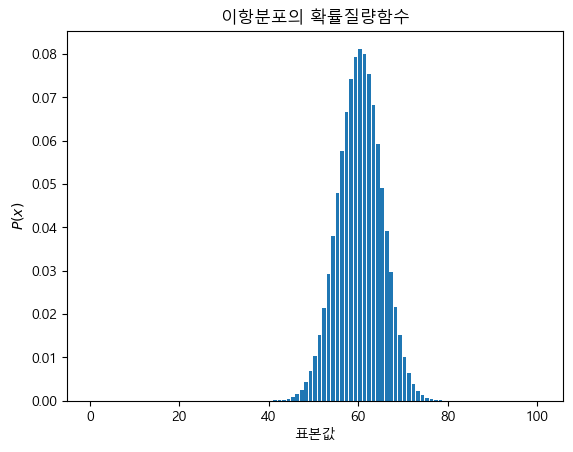

In [36]:
xx=np.arange(N+1)
plt.bar(xx,rv.pmf(xx),align='edge')
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항분포의 확률질량함수")
plt.show()


- <<결론>> 특성값 n과 p에 대해, 0~n까지 가능한 모든 성공 횟수에 대한 확률에 시각화 했다.
- 확률은 성공 횟수가 증가 함에 따라 처음에는 증가하다가 특정 점 이후에 감소하는 종 모양의 분포를 나타낸다
- 이항 분포가 대칭적이거나 약각 비대칭적일 수 있다. -> 그래프 모양의 변경은 p,n에 따라 달라진다

binom.rvs(n,p,loc=0,size=1,random_state=None)

In [38]:
from scipy.stats import binom
#이항 분포의 난수를 발생해 보자 : 같은 코드 다른 난수값
print(binom.rvs(n=50,p=0.5,size=3))
print(binom.rvs(n=50,p=0.5,size=3))

[18 25 24]
[28 28 30]


In [39]:
# 이항 분포의 난수를 발생해 보자 : 같은 코드 같은 난수값
print(binom.rvs(n=50,p=0.5,size=3,random_state=3))
print(binom.rvs(n=50,p=0.5,size=3,random_state=3))

[25 27 23]
[25 27 23]


In [44]:
#ex) 무작위 표본을 추출하는 시뮬레이션을 한 결과, binom.rvs로 난수를 발생
np.random.seed(0)
x=rv.rvs(100)
x

array([54, 59, 66, 63, 64, 63, 61, 64, 51, 57, 57, 57, 57, 57, 59, 65, 58,
       58, 59, 75, 55, 56, 55, 57, 64, 62, 63, 59, 63, 56, 61, 58, 60, 63,
       57, 53, 51, 62, 60, 65, 64, 62, 64, 53, 53, 57, 62, 56, 63, 56, 53,
       61, 57, 62, 61, 51, 56, 54, 64, 58, 62, 59, 54, 60, 58, 58, 65, 57,
       61, 64, 57, 51, 57, 63, 59, 57, 59, 64, 56, 62, 61, 61, 56, 67, 59,
       62, 61, 63, 52, 61, 60, 55, 54, 73, 64, 65, 54, 54, 58, 56],
      dtype=int64)

In [47]:
xx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

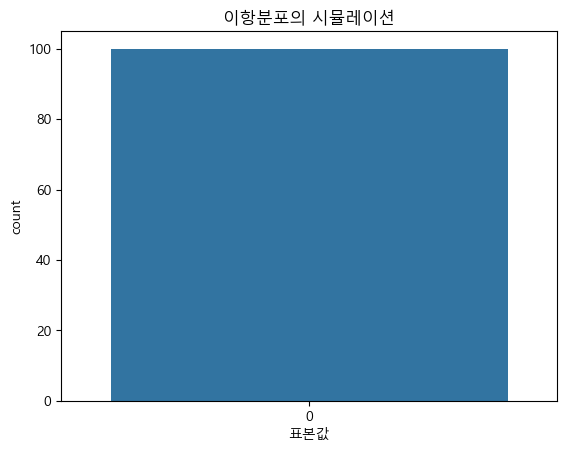

In [50]:
import seaborn as sns
sns.countplot(x)
plt.xlabel("표본값")
plt.title("이항분포의 시뮬레이션")
plt.show()

## 기하분포

In [22]:
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [23]:
p = 0.5
X = Ge(p)

In [24]:
check_prob(X)

expected value 2.0
variance 2.0


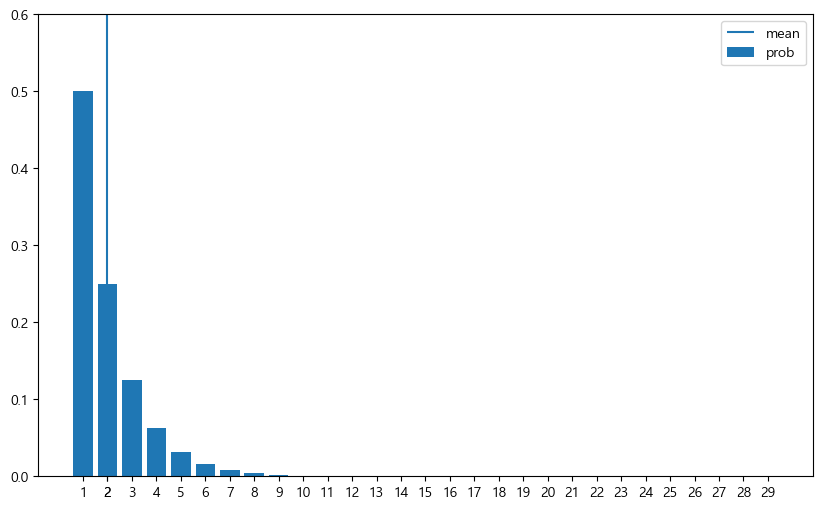

In [25]:
plot_prob(X)

성공할 확률은 횟수가 낮을수록 높다
- 기하분포의 확률잘량함수를 나타내는 그래프
- 첫번째 성공이 나타날때 까지의 독립적인 베르누이 시행 횟수를 모델링한다
- x축은 첫번째 성공까지의 시행횟수를 나타내고 , y축은 해당시행 횟수의 첫번째 성공이 발생할 확률
- 막대는 각 시행횟수에 대한 확률을 시각적으로 표현
- 결론 : 
    - 확률은 첫번째 시행에서의 성공확률이 가장 높고 , 시행횟수가 증가함에 따라 급격히 감소한다
    - 기하 분포의 특성에 따라 해당시행 횟수의 첫번째 성공이 발생할 확률높다
    - 기하 분포의 평균은 첫번째 성공까지 기대되는 횟수를 반영하는데 시행횟수가 많아 질수록 첫번째 성공이 나타날 확률이 낮아진다.

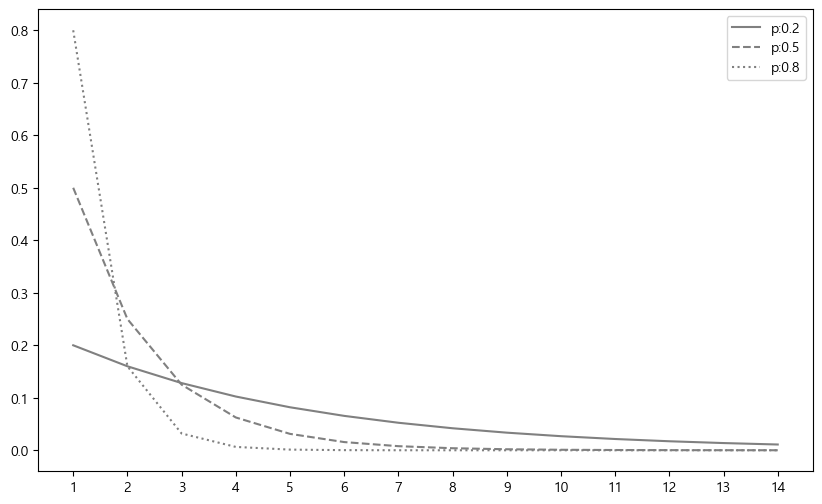

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

횟수가 낮을수록 성공할 확률이 높다
- 세 개의 선이 각각 p=0.2,p=0.5,p0.8의 확률을 나타낸다
- p값이 클수록(0.8) 첫번째 성공의 확률이 높다 -> pmf가 오른쪽으로 치우친 형태를 보인다
- p값이 작을수록(0.2) 첫 성공 확률이 낮다
- p값이 0.5는 기하 분포의 중간 정도의 기대 시행 횟수를 보여준다. 첫번째 성공할 확률이 50% 이며 pmf가 중간정도으 높이에서 시작하여 감소한다 
- 결론 : 성공 확률이 높을수록, 즉 p값이 클수록 첫 성공까지 적은 시행이 필요하다

## 포아송 분포 : 특정기간 동안, 특정 영역에서 발생되는 사건 발생횟수(빈도)
- 이벤트의 평균 발생 빈도 , 이산확률분포

### ex) 은행에서 특정시간에 대기자가 늘어나는 분포
### ex) 한시간동안 웹사이트에 접속하는 사용자 수
### ex) 특정 기간 동안 발생하는 교통사고 수 
### ex) 특정 지역에서 일어나는 자연 재해 횟수

In [27]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [28]:
lam = 3
X = Poi(lam)

In [29]:
check_prob(X)

expected value 3.0
variance 3.0


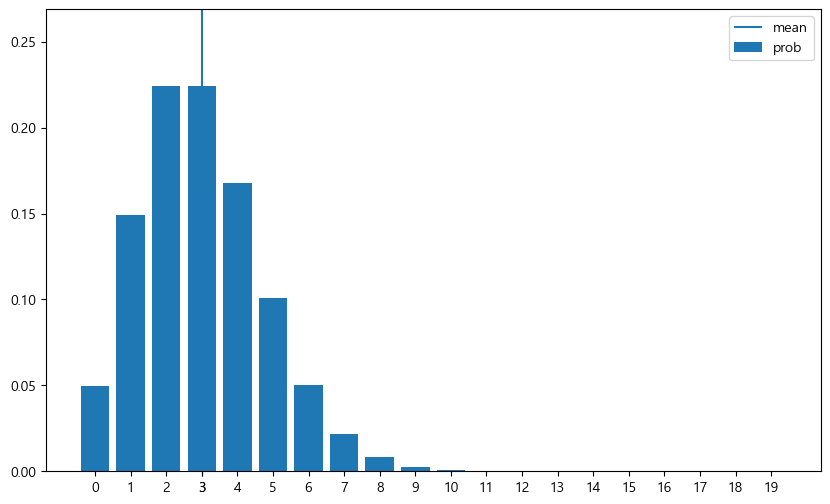

In [30]:
plot_prob(X)

- 포아송 분포는 일정 시간 또는 공간 내에서 일어나는 사건의 발생 횟수를 모델링,사건의 발생 확률을 각각의 발생 횟수에 대해 시각적으로 표현
- x축은 사건의 발생 횟수로 0부터 19까지의 발생 횟수를 나타냄
- y축은 각 발생 횟수에 대한 확률로 해당 발생 횟수가 관측될 상대적 빈도를 나타냄
- 막대 각 발생 횟수에 대한 확률로 막대의 높이가 해당 횟수의 확률과 일치함
- 확률은 사건의 발생 횟수가 적을 때 높고, 발생 횟수가 증가함에 따라 감소하는 경향을 보인다.  
- 평균에 가까운 발생 횟수가 가장 높은 확률을 갖고, 평균에서 멀어질수록 확률이 낮아지는 것을 볼 수있다.

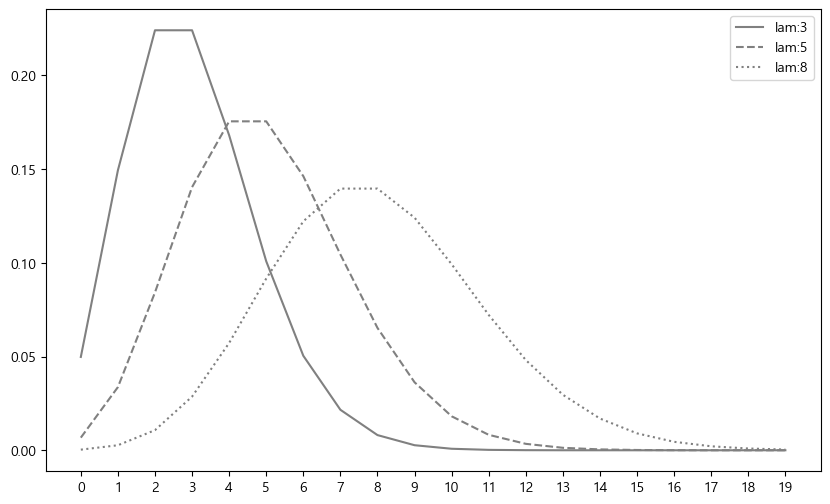

In [31]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

다른 평균 발생 빈도(λ, 람다) 값을 가지고 있으며, 이는 발생 이벤트의 평균 빈도를 나타낸다  
λ 값이 3, 5, 8인 세 개의 포아송 분포로 실선은 λ=3, 파선은 λ=5, 점선은 λ=8을 의미  
평균 람다 값이 클수록, 그래프는 더 평평하고 오른쪽으로 넓게 퍼진다.  
높은 람다 값은 발생 횟수가 더 넓게 분포되어 있고 람다 값이 작을수록 그래프는 더 뾰족하고 좌측에 집중되어 있다.  
람다 값이 높아질수록 사건의 발생 횟수의 변동이 더 크고, 사건의 발생이 더 흔해진다는 것을 의미한다.  

<img src="./분포1.png" width="1200px" >

- 음이항 분포 : k번 성공할 때까지의 시행의 횟수 x를 변수로하는 분포 / 성공횟수 고정 (상수)
- 지수 분포 : 한 사건이 발생할 때 까지의 대기시간을 모델링 ex) 다음 전화가 걸려올때 까지의 시간
- 감마 분포 : 여려 사건이 발생할 때까지의 대기시간을 모델링 ex) 전체 전화 걸려온 대수와 시간 (베이지안 통계 사전분포로 사용)